In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [154]:
#Question
#In this assignment, you will predict the life expectancy of a newborn based on several attributes (features) related to the region which he/she was born in.

In [155]:
#Set up
life_expectancy_train_dataset = "s3://rmit-ml-2020s1-lab-data/Assignment1_data/train.csv"
life_expectancy_test_dataset = "s3://rmit-ml-2020s1-lab-data/Assignment1_data/test.csv"

In [156]:
#Set Dataframes
le_train_DF = pd.read_csv(life_expectancy_train_dataset) #Training Set Dataframe
le_test_DF = pd.read_csv(life_expectancy_test_dataset) #Test Set Dataframe


ID                                 AxesSubplot(0.125,0.772143;0.110714x0.107857)
TARGET_LifeExpectancy           AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Country                         AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Year                            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Status                          AxesSubplot(0.656429,0.772143;0.110714x0.107857)
AdultMortality                  AxesSubplot(0.789286,0.772143;0.110714x0.107857)
AdultMortality-Male                AxesSubplot(0.125,0.642714;0.110714x0.107857)
AdultMortality-Female           AxesSubplot(0.257857,0.642714;0.110714x0.107857)
InfantDeaths                    AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Alcohol                         AxesSubplot(0.523571,0.642714;0.110714x0.107857)
PercentageExpenditure           AxesSubplot(0.656429,0.642714;0.110714x0.107857)
Measles                         AxesSubplot(0.789286,0.642714;0.110714x0.107857)
BMI                         

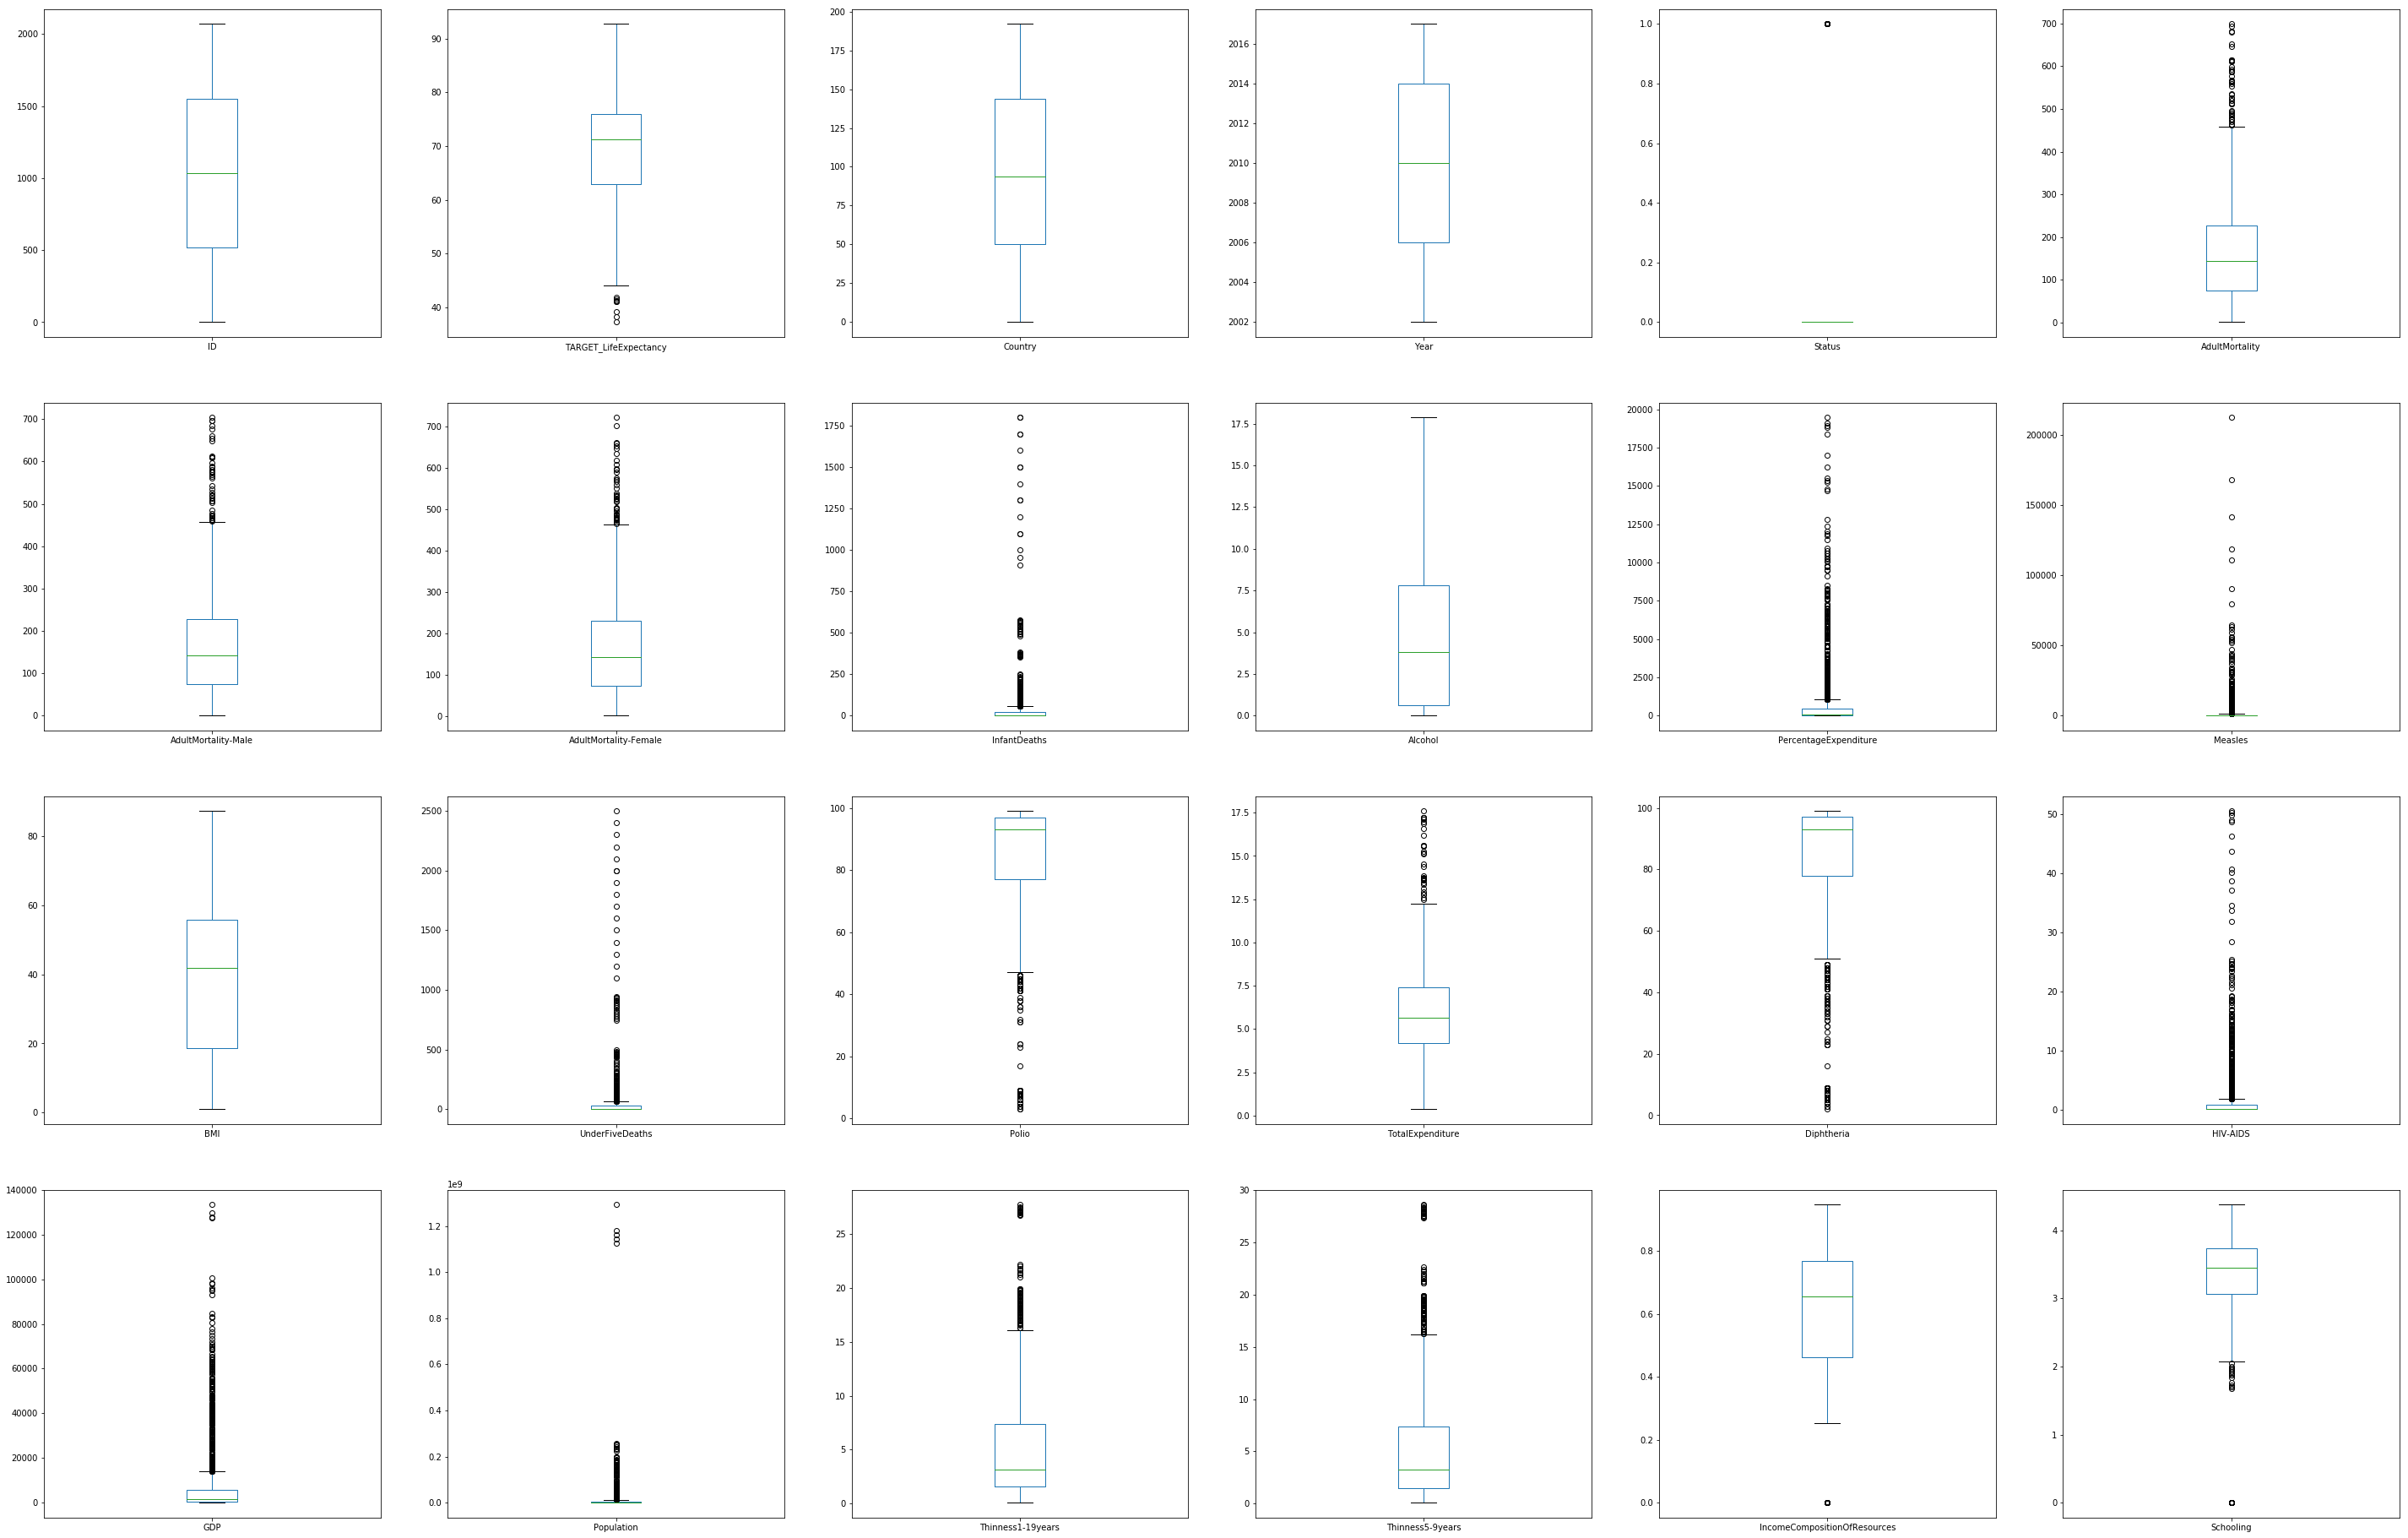

In [157]:
#Analysis of Data

#Box Plot to find the outliers within the dataset
le_train_DF.plot(kind="box", subplots=True, layout=(6,6),
                sharex=False, sharey=False, figsize=(50,50))


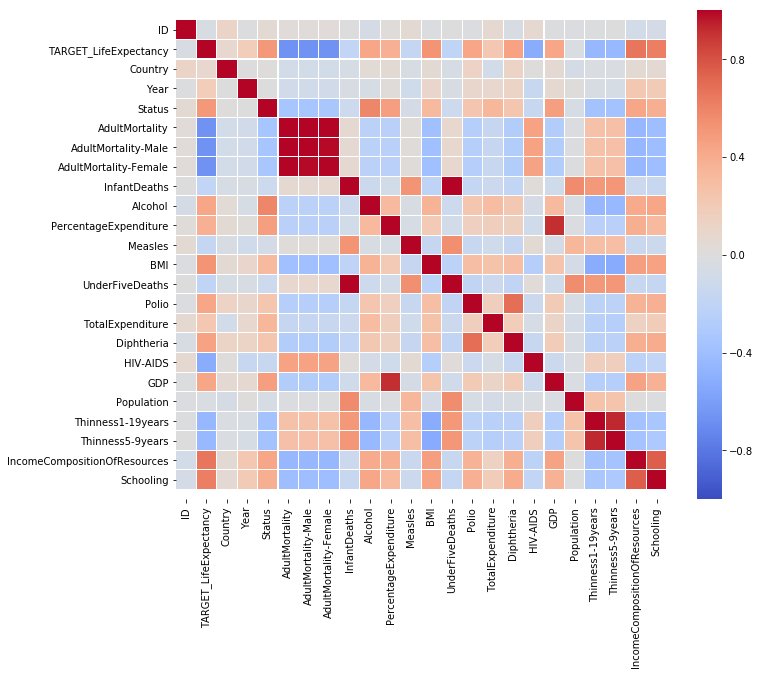

In [163]:
#Analysis- Correlation Heat Map
import seaborn as sns

correlations = le_train_DF.corr()

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(round(correlations,2), ax=ax, cmap="coolwarm", vmin=-1, vmax=1, fmt='.2f', linewidths=.05)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [177]:
#Normalise the data, using mean normalisation method
#Through the analysis, 
#it has been observed on the box plots that there are significant outliers.
#Min Max Scaling does not handle outliers very well, so mean normalisation has been chosen instead
independent_scaler = preprocessing.StandardScaler()
target_scaler = preprocessing.StandardScaler()
dataframe_scaler = preprocessing.StandardScaler()

#Set X as all independent variables (minus TARGET_LifeExpectancy)
X_DF = le_train_DF.iloc[:, 2:]

#Set Y as dependent variable 'TARGET_LifeExpectancy'
Y_DF = le_train_DF['TARGET_LifeExpectancy']

# #Convert into Array to manipulate
X_values = X_DF.values
Y_values = Y_DF.values

print(X_values.shape)
X_values_scaled = independent_scaler.fit_transform(X_values)
Y_values_scaled = target_scaler.fit_transform(Y_values.reshape(-1, 1))

X = pd.DataFrame(X_values_scaled, columns=X_DF.columns)
Y = pd.DataFrame(Y_values_scaled)

# print(X_values_scaled.shape)
# print(Y_values_scaled.shape)


n_le_DF = dataframe_scaler.fit_transform(le_train_DF.values)
print(X_values_scaled)
X


(2071, 22)
[[ 0.92326837  1.62179845 -0.47709852 ...  2.57561112 -0.6030632
  -0.32911334]
 [ 0.92326837  1.40502134 -0.47709852 ...  2.61741384 -0.61692131
  -0.35581444]
 [ 0.92326837  1.18824422 -0.47709852 ...  2.65921657 -0.64463754
  -0.38264938]
 ...
 [-0.62645795 -1.19630402 -0.47709852 ...  0.48547479 -0.81555425
  -0.35581444]
 [-0.62645795 -1.41308113 -0.47709852 ...  0.50637615 -0.85712859
  -0.4096202 ]
 [-0.62645795 -1.62985825 -0.47709852 ...  0.52727751 -0.88484481
  -0.46397786]]


Country      Year    Status  AdultMortality  AdultMortality-Male  \
0     0.923268  1.621798 -0.477099        0.842841             0.838195   
1     0.923268  1.405021 -0.477099        0.910156             0.972184   
2     0.923268  1.188244 -0.477099        0.884913             0.704207   
3     0.923268  0.971467 -0.477099        0.918571             0.720955   
4     0.923268  0.754690 -0.477099        0.943814             0.972184   
5     0.923268  0.537913 -0.477099        0.977472             0.871692   
6     0.923268  0.321136 -0.477099        0.994300             0.905189   
7     0.923268  0.104359 -0.477099        1.044787             0.955435   
8     0.923268 -0.112418 -0.477099        1.112102             0.955435   
9     0.923268 -0.329196 -0.477099        1.112102             1.189915   
10    0.923268 -0.545973 -0.477099        1.078445             1.206663   
11    0.923268 -0.762750 -0.477099        1.095274             1.039178   
12    0.923268 -0.979527 -0.477099        1.112102             1.374149   
13    0.923268 -1.196304 -0.477099       -1.344911            -1.339115   
14    0.923268 -1.413081 -0.477099        1.288805             1.256909   
15    0.923268 -1.629858 -0.477099        1.330878             1.223412   
16    1.069125  1.621798 -0.477099       -0.747487            -0.719419   
17    1.069125  1.405021 -0.477099       -1.302839            -1.305618   
18    1.069125  1.188244 -0.477099       -0.663342            -0.635676   
19    1.069125  0.971467 -0.477099       -0.646513            -0.618928   
20    1.069125  0.754690 -0.477099       -0.629685            -0.618928   
21    1.069125  0.537913 -0.477099       -0.604441            -0.635676   
22    1.069125  0.321136 -0.477099       -0.604441            -0.602179   
23    1.069125  0.104359 -0.477099       -1.361740            -1.355863   
24    1.069125 -0.112418 -0.477099       -1.294425            -1.288869   
25    1.069125 -0.329196 -0.477099       -0.537126            -0.551934   
26    1.069125 -0.545973 -0.477099       -1.243938            -1.238624   
27    1.069125 -0.762750 -0.477099       -1.227109            -1.221875   
28    1.069125 -0.979527 -0.477099       -1.218695            -1.221875   
29    1.069125 -1.196304 -0.477099       -1.243938            -1.238624   
...        ...       ...       ...             ...                  ...   
2041 -0.371209  1.188244 -0.477099        0.531507             0.519973   
2042 -0.371209  0.971467 -0.477099        0.615651             0.637213   
2043 -0.371209  0.754690 -0.477099        0.598822             0.704207   
2044 -0.371209  0.537913 -0.477099        0.590408             0.653961   
2045 -0.371209  0.321136 -0.477099        0.607237             0.737704   
2046 -0.371209  0.104359 -0.477099        0.632480             0.720955   
2047 -0.371209 -0.112418 -0.477099       -1.168208            -1.154881   
2048 -0.371209 -0.329196 -0.477099        0.666138             0.687458   
2049 -0.371209 -0.545973 -0.477099        0.691381             0.737704   
2050 -0.371209 -0.762750 -0.477099        0.708210             0.653961   
2051 -0.371209 -0.979527 -0.477099        0.725039             0.503224   
2052 -0.371209 -1.196304 -0.477099       -1.159794            -1.138132   
2053 -0.371209 -1.413081 -0.477099        0.741867             0.687458   
2054 -0.371209 -1.629858 -0.477099        0.750282             0.737704   
2055 -0.626458  1.621798 -0.477099       -1.092478            -1.121384   
2056 -0.626458  1.405021 -0.477099        1.271977             1.240160   
2057 -0.626458  1.188244 -0.477099        1.389779             1.307154   
2058 -0.626458  0.971467 -0.477099        1.566482             1.642125   
2059 -0.626458  0.754690 -0.477099        1.709527             1.675622   
2060 -0.626458  0.537913 -0.477099        1.684284             1.658874   
2061 -0.626458  0.321136 -0.477099        1.726356             1.457891   
2062 -0.626458  0.104359 -0.4770

[[ 1.          0.92326837  1.40502134 ...  0.04818443  0.02779076
   0.01602855]
 [ 1.          0.92326837  1.18824422 ...  0.06084617  0.03611758
   0.02143898]
 [ 1.          0.92326837  0.97146711 ...  0.07689633  0.04652812
   0.02815305]
 ...
 [ 1.         -0.62645795 -1.19630402 ...  0.0842079   0.03673868
   0.01602855]
 [ 1.         -0.62645795 -1.41308113 ...  0.12326923  0.05891014
   0.02815305]
 [ 1.         -0.62645795 -1.62985825 ...  0.16854999  0.08838099
   0.04634352]]
[[-0.99942124]
 [-1.23148895]
 [-1.45300813]
 ...
 [-2.43402164]
 [-2.33908485]
 [-2.9719968 ]]
[[ 1.          0.92326837  1.62179845 ...  0.03939278  0.02149806
   0.01173227]
 [ 1.          0.92326837  1.40502134 ...  0.04818443  0.02779076
   0.01602855]
 [ 1.          0.92326837  1.18824422 ...  0.06084617  0.03611758
   0.02143898]
 ...
 [ 1.         -0.62645795 -1.19630402 ...  0.0842079   0.03673868
   0.01602855]
 [ 1.         -0.62645795 -1.41308113 ...  0.12326923  0.05891014
   0.02815305]
 [

Text(0, 0.5, 'Average R-Score')

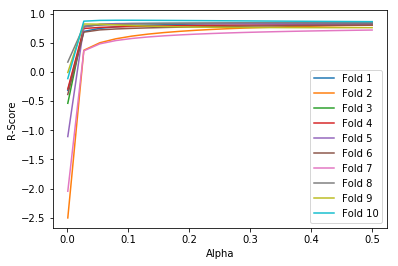

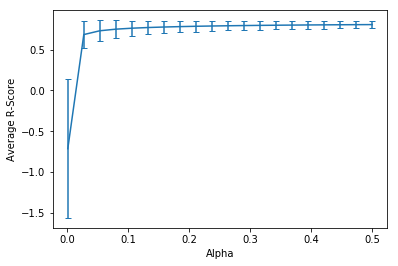

In [185]:
#Splitting Training and Validation set, via KFold Method
# To determine the best regression parameter is best, utilise cross validation to obtain the most effective one.
#Utilising Lasso Regression, although similar to Ridge Regression, it is better at eliminating use variables within our model
from sklearn import linear_model
from sklearn.metrics import r2_score
lRegPara = np.linspace(0.001,.5,num=20)
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0

for trainIndex, validIndex in kFold.split(X):
    # Get the training and validation data
    trainX = np.array(X.loc[trainIndex])
    trainY = np.array(Y.loc[trainIndex])
    validX = np.array(X.loc[validIndex])
    validY = np.array(Y.loc[validIndex])
    
    # This is where you're polynomial model is used!
    polyFitTrainX = polyFeat.fit_transform(trainX)
    polyFitValidX = polyFeat.fit_transform(validX)
    
    print(polyFitTrainX)
    print(trainY)

    for j , regPara in enumerate(lRegPara):
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True)
        polyRidgeReg.fit(polyFitTrainX, trainY)
        predY = polyRidgeReg.predict(polyFitValidX)
        r2 = r2_score(validY, predY)
        lResults[nsplit, j] = (r2)
        
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1
    
plt.xlabel("Alpha")
plt.ylabel("R-Score")
plt.legend()

plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average R-Score")

In [183]:
# #Histograms
# X.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
#            xlabelsize=8, ylabelsize=8, grid=True)
plt.show()

MSE :  0.8768260938649399


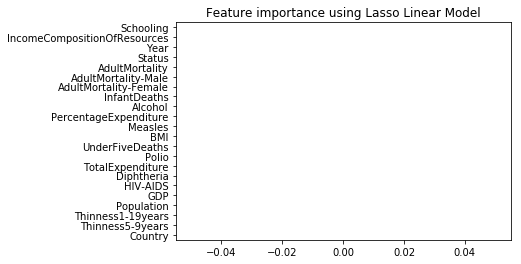

In [184]:
from sklearn.metrics import mean_squared_error
trainX, validX, trainY, validY = model_selection.train_test_split(X, Y, test_size=0.20)
LassoReg = linear_model.Lasso(alpha=0.05, normalize=True)
LassoReg.fit(trainX, trainY)
predY = LassoReg.predict(validX)
mse = mean_squared_error(validY, predY)
print("MSE : ", mse)
coef = pd.Series(np.squeeze(LassoReg.coef_), index = X.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Linear Model")
plt.show()


In [ ]:
#Validation and Evaluation Set


In [ ]:
#Training model